# Import librerie

In [64]:
import pandas as pd
import numpy as np
from scipy.spatial import ConvexHull

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# utility functions Massimo De Santi
import mds_ml as mds

%matplotlib inline



# Esercizio 1

Nel portale iCorsi, nell'ultima sezione, trovate un dataset salaryData. Il dataset e'
molto semplice: ogni istanza dice a quanto corrisponde il salario annuale di un individuo a seconda
degli anni di esperienza nel settore in cui lavora (in verita', i numeri non sono molto realistici).

### Analisi esplorativa dei dati

In [2]:
df = pd.read_csv('./salaryData.csv')
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [3]:
mds.display_n(df, 2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
...,...,...
28,10.3,122391.0
29,10.5,121872.0


array([[<AxesSubplot:title={'center':'YearsExperience'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

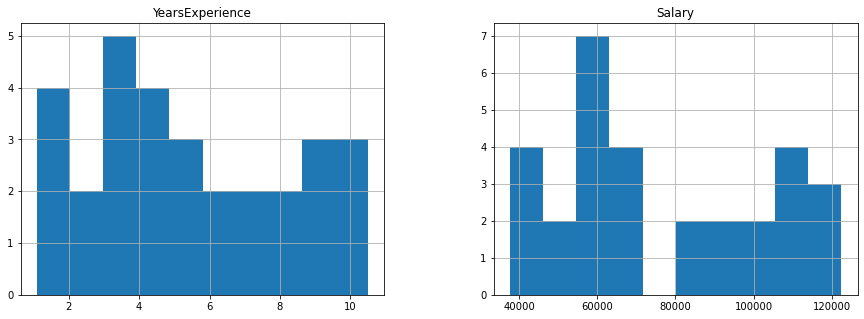

In [4]:
# Visualizzazione grafica della distribuzione dei valori delle features (istogrammi)
df.hist(figsize=(15,5))

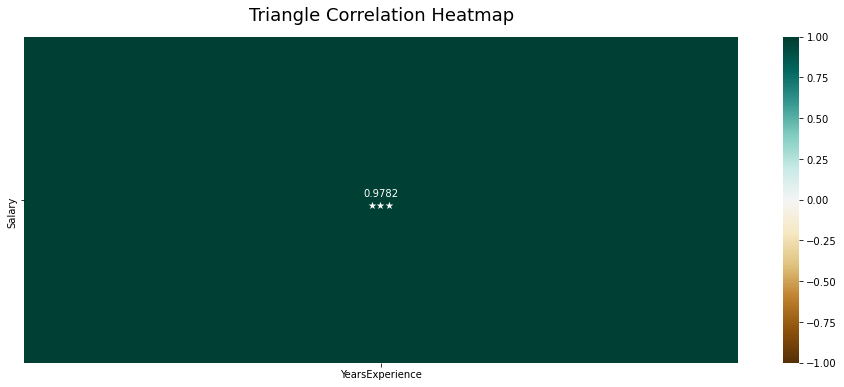

In [5]:
mds.plot_heatmap_corr(df)

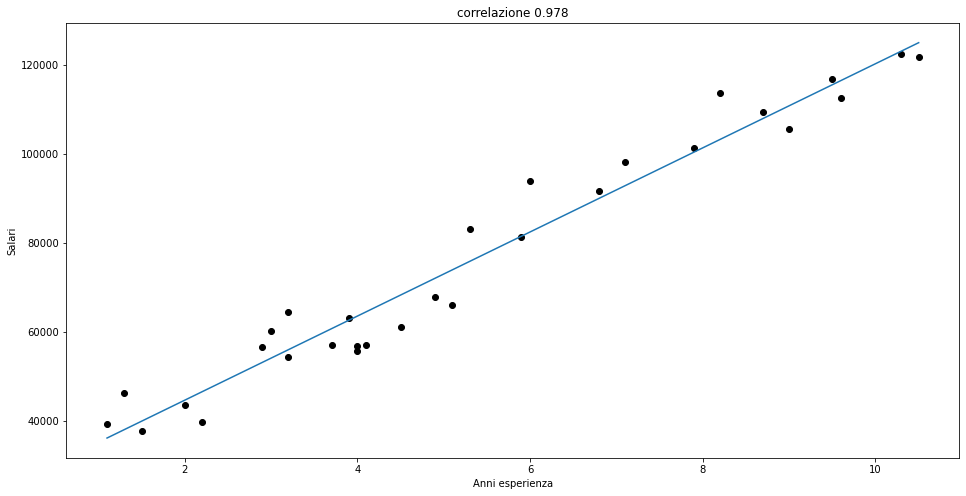

In [6]:
mds.plot_correlation(df, 'YearsExperience', 'Salary', 'Anni esperienza', 'Salari')

### Preprocessing

In [7]:
df['Salary_K'] = df['Salary'].apply(lambda x: int(x / 1000))
mds.display_n(df, 2)

,YearsExperience,Salary,Salary_K
0,1.1,39343.0,39
1,1.3,46205.0,46
...,...,...,...
28,10.3,122391.0,122
29,10.5,121872.0,121


### Split validation set

In [8]:
test_portion = 0.3
x_features = ['YearsExperience']
y_feature = 'Salary_K'
train_x, test_x, train_y, test_y = mds.split_train_test(df, test_portion, x_features, y_feature)


### Linear Regression

Train RMSE: 5.545
Test RMSE: 6.205
R2 score: 0.925


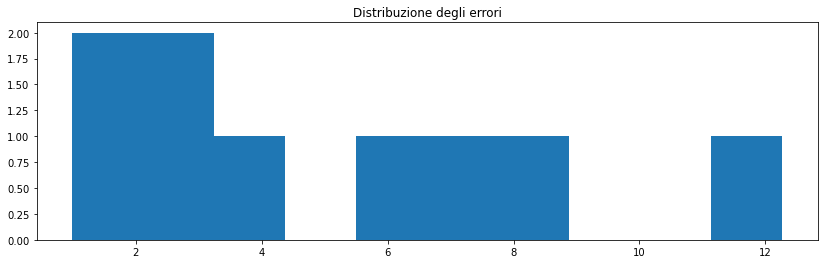

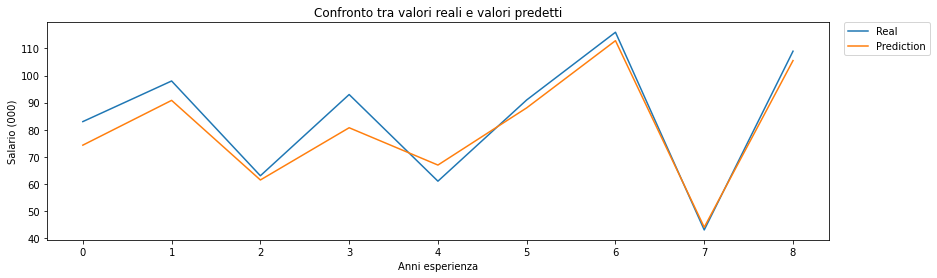

In [9]:
# Addestramento di un LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_x, train_y)

test_y_predicted = mds.evaluate_estimator(lin_reg, train_x, train_y, test_x, test_y)
mds.plot_errors(test_y, test_y_predicted)
mds.plot_real_prediction(test_y, test_y_predicted, 'Anni esperienza', 'Salario (''000)')

### Ridge Regression

Best Params: {'alpha': 1}
Best Score: -35.992
Train RMSE: 5.547
Test RMSE: 6.264
R2 score: 0.924


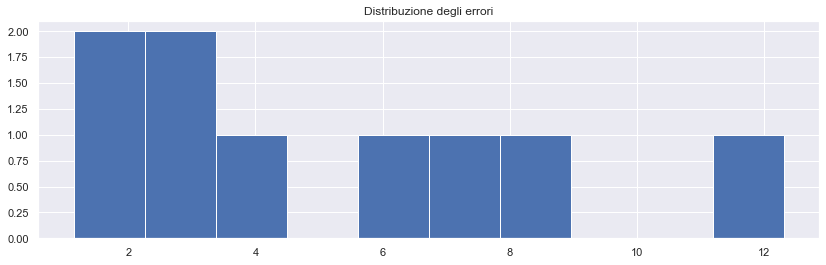

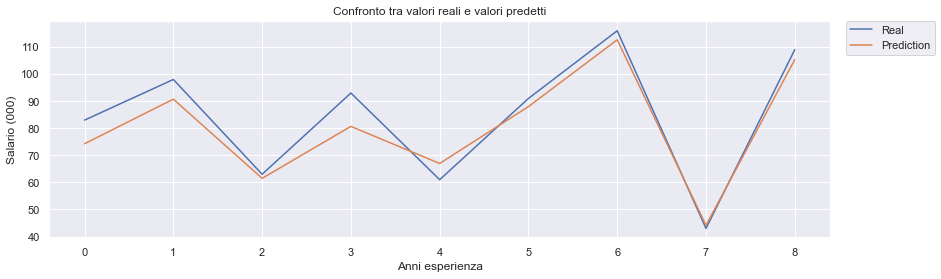

In [29]:
# Parametri per GridSearch
param_grid = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
# Numero di fold per la Cross-validation
n_folds = 5

best_estimator = mds.search_best_estimator(Ridge(), param_grid, train_x, train_y, n_folds)
test_y_pred = mds.evaluate_estimator(best_estimator, train_x, train_y, test_x, test_y)
mds.plot_errors(test_y, test_y_pred)
mds.plot_real_prediction(test_y, test_y_pred, 'Anni esperienza', 'Salario (''000)')

# Esercizio 2
Generate una funzione di tipo y = x^3 nell'intervallo [5, 5]. Aggiungete del rumore
di tipo Gaussiano (random.normal) con valore medio = 0 e deviazione standard = 0.2 a questi
dati. Questo sara il vostro dataset.

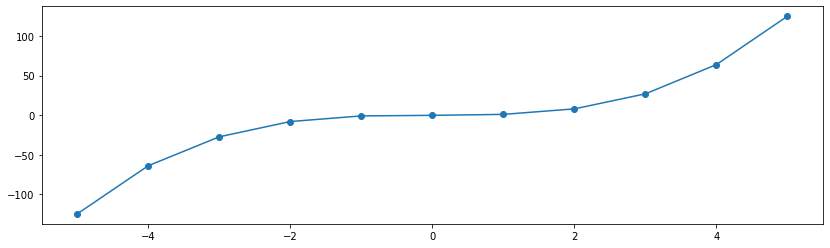

In [11]:
# range dati [-5,5] con step 1
x = np.array([i for i in range(-5, 6, 1)])

# Funzione y = x^3
np.random.seed(10)  #Setting seed for reproducability
y = x**3 + np.random.normal(0, 0.2, len(x))
df = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
mds.plot_line(df['x'], df['y'])

In [12]:
# crea nuove colonne con potenza da 2 a 10
max_power = 10
for i in range(2, max_power+1): 
    df[f'x_{i}'] = df['x']**i
mds.display_n(df, 2)

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10
0,-5.0,-124.733683,25.0,-125.0,625.0,-3125.0,15625.0,-78125.0,390625.0,-1953125.0,9765625.0
1,-4.0,-63.856944,16.0,-64.0,256.0,-1024.0,4096.0,-16384.0,65536.0,-262144.0,1048576.0
...,...,...,...,...,...,...,...,...,...,...,...
9,4.0,63.965080,16.0,64.0,256.0,1024.0,4096.0,16384.0,65536.0,262144.0,1048576.0
10,5.0,125.086605,25.0,125.0,625.0,3125.0,15625.0,78125.0,390625.0,1953125.0,9765625.0


,R2,rmse,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10
model_pow_01,0.849872,23.6493,6152.19,0.0187474,17.7936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_02,0.849873,23.6492,6152.14,-0.0508857,17.7936,0.00696331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_03,0.999996,0.120047,0.158524,-0.0508857,0.0305312,0.00696331,0.997925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_04,0.999997,0.106163,0.123975,0.0150596,0.0305312,-0.0159344,0.997925,0.000915907,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_05,0.999997,0.10616,0.123971,0.0150596,0.0313766,-0.0159344,0.997784,0.000915907,4.43379e-06,NaN,NaN,NaN,NaN,NaN
model_pow_06,0.999997,0.105391,0.12218,0.0310371,0.0313766,-0.0284633,0.997784,0.00229729,4.43379e-06,-3.6615e-05,NaN,NaN,NaN,NaN
model_pow_07,0.999998,0.0817981,0.0736002,0.0310371,-0.0992397,-0.0284633,1.04367,0.00229729,-0.00385899,-3.6615e-05,8.96866e-05,NaN,NaN,NaN
model_pow_08,1,0.0430783,0.0204131,-0.0669021,-0.0992397,0.120605,1.04367,-0.0315563,-0.00385899,0.00232539,8.96866e-05,-4.9622e-05,NaN,NaN
model_pow_09,1,0.039659,0.0173012,-0.0669021,-0.0448006,0.120605,1.00703,-0.0315563,0.00247977,0.00232539,-0.000298209,-4.9622e-05,7.57958e-06,NaN
model_pow_10,1,3.87372e-14,1.65062e-26,-0.144017,-0.0448006,0.34988,1.00703,-0.133523,0.00247977,0.0172148,-0.000298209,-0.000886034,7.57958e-06,1.55802e-05


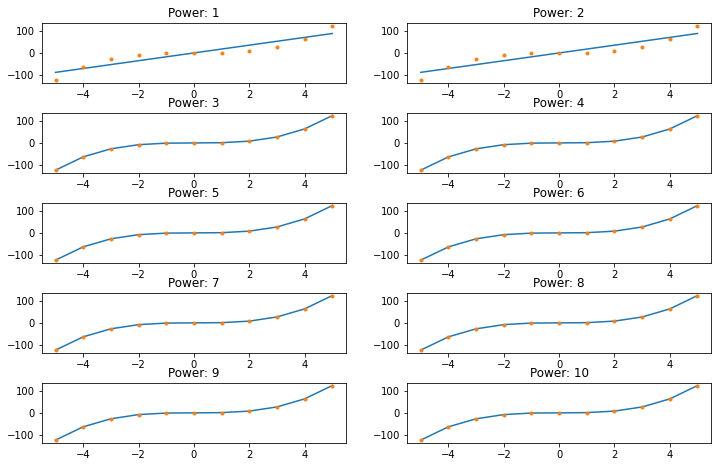

In [13]:
# Initialize a dataframe to store the results:
base_col = ['R2','rmse','rss','intercept']
col = base_col + [f'coef_x_{i}' for i in range(1, max_power+1)]
ind = [f'model_pow_{i:02}' for i in range(1, max_power+1)]
coef_matrix = pd.DataFrame(index=ind, columns=col)

y = df['y']
# Itera su tutte le potenze e riempie la matrice delle metriche
for power in range(1, max_power+1):
    x = mds.x_poly(df, power)
    reg = LinearRegression(normalize=True)
    reg.fit(x, y)
    y_pred = reg.predict(x)
    metrics = mds.regression_metrics(reg, x, y, y_pred)
    idx=power
    mds.plot_regression(df, y_pred, idx, max_power, 2, f'Power: {idx}')
    coef_matrix.iloc[power-1, 0:power+len(base_col)] = metrics
# Visualizza matrice metriche e coefficienti     
coef_matrix

,R2,rmse,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5
alpha_1e-15,0.999997,0.10616,0.123971,0.0150596,0.0313766,-0.0159344,0.997784,0.000915907,4.43379e-06
alpha_1e-10,0.999997,0.10616,0.123971,0.0150596,0.0313767,-0.0159344,0.997784,0.000915907,4.43431e-06
alpha_1e-08,0.999997,0.10616,0.123971,0.0150596,0.0313876,-0.0159344,0.997783,0.000915907,4.4857e-06
alpha_0.0001,0.999995,0.13151,0.190243,0.014892,0.139193,-0.0158801,0.981142,0.000913799,0.000509554
alpha_0.001,0.999892,0.634759,4.4321,0.0134241,0.90255,-0.0154046,0.863608,0.000895331,0.00406948
alpha_0.01,0.998759,2.15038,50.8657,0.00194566,3.06604,-0.0116694,0.539811,0.000749976,0.0136414
alpha_1,0.926812,16.5123,2999.2,-0.0227873,4.39475,0.00189717,0.265297,0.000126759,0.0114794
alpha_5,0.588445,39.1562,16865.3,0.000590692,2.24512,0.000960331,0.128111,4.8053e-05,0.00547583
alpha_10,0.389908,47.6743,25001.3,0.00814292,1.37842,0.000570466,0.0780425,2.75273e-05,0.00332925
alpha_20,0.230988,53.5246,31513.7,0.0129613,0.777007,0.00031388,0.0438172,1.48729e-05,0.00186731


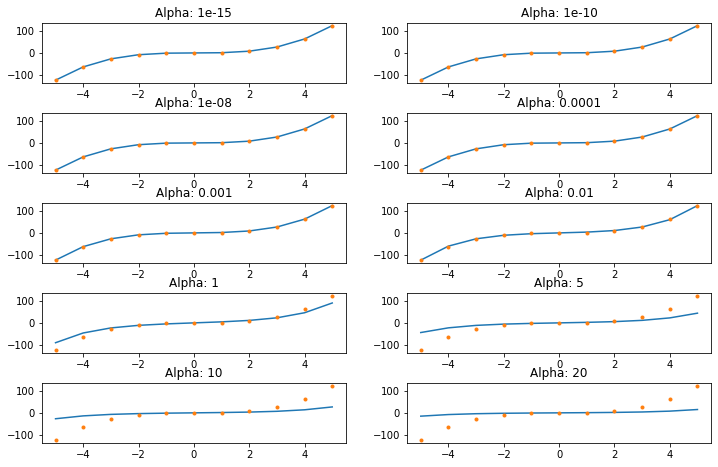

In [14]:
# valori di alpha da testare
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

# Scelgo ordine polinomiale 3
max_power = 5
x = mds.x_poly(df, max_power)
y = df['y']

#Initialize the dataframe for storing coefficients.
base_col = ['R2','rmse','rss','intercept']
col = base_col + [f'coef_x_{i}' for i in range(1, max_power+1)]
ind = [f'model_pow_{i:02}' for i in range(1, max_power+1)]
ind = [f'alpha_{alphas[i]}' for i in range(0, len(alphas))]
coef_matrix = pd.DataFrame(index=ind, columns=col)

for i,alpha in enumerate(alphas):
    reg = Ridge(alpha=alpha, normalize=True)
    reg.fit(x, y)
    y_pred = reg.predict(x)
    metrics = mds.regression_metrics(reg, x, y, y_pred)
    mds.plot_regression(df, y_pred, i+1, len(alphas), 2, f'Alpha: {alpha}')
    coef_matrix.iloc[i,] = metrics
# Visualizza matrice metriche e coefficienti     
coef_matrix

,R2,rmse,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5
alpha_1e-15,0.999996,0.123062,0.166588,0.0150596,0.119846,-0.0159344,0.984463,0.000915907,0.000404712
alpha_1e-10,0.999996,0.123062,0.166588,0.0150596,0.119846,-0.0159344,0.984463,0.000915907,0.000404712
alpha_1e-08,0.999996,0.123062,0.166588,0.0150593,0.119846,-0.0159343,0.984463,0.000915903,0.000404712
alpha_1e-05,0.999996,0.123055,0.166568,0.0147351,0.11982,-0.015831,0.984466,0.000911922,0.000404606
alpha_0.0001,0.999996,0.123012,0.166453,0.0118145,0.11959,-0.0149004,0.984493,0.000876052,0.000403653
alpha_0.001,0.999996,0.124816,0.171369,-0.0173915,0.117291,-0.00559502,0.984769,0.000517354,0.000394115
alpha_0.01,0.999995,0.131007,0.188792,-0.0131562,0.093643,0,0.987628,0.000179234,0.000295788
alpha_1,0.997042,3.31958,121.216,0.0187474,0,0,0.945076,0,0
alpha_5,0.926177,16.5837,3025.22,0.0187474,0,0,0.727855,0,0
alpha_10,0.704725,33.1665,12100.2,0.0187474,0,0,0.456329,0,0


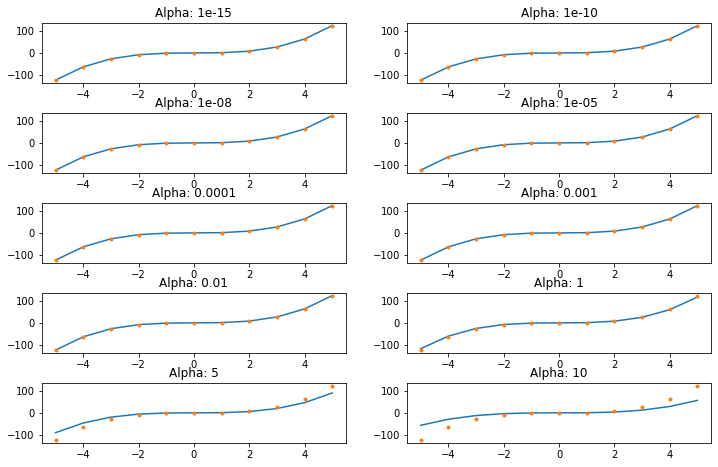

In [15]:
# valori di alpha da testare
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

# Scelgo ordine polinomiale 3
max_power = 5
x = mds.x_poly(df, max_power)
y = df['y']

#Initialize the dataframe for storing coefficients.
base_col = ['R2','rmse','rss','intercept']
col = base_col + [f'coef_x_{i}' for i in range(1, max_power+1)]
ind = [f'model_pow_{i:02}' for i in range(1, max_power+1)]
ind = [f'alpha_{alphas[i]}' for i in range(0, len(alphas))]
coef_matrix = pd.DataFrame(index=ind, columns=col)

for i,alpha in enumerate(alphas):
    reg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    reg.fit(x, y)
    y_pred = reg.predict(x)
    metrics = mds.regression_metrics(reg, x, y, y_pred)
    mds.plot_regression(df, y_pred, i+1, len(alphas), 2, f'Alpha: {alpha}')
    coef_matrix.iloc[i,] = metrics
# Visualizza matrice metriche e coefficienti     
coef_matrix

In [16]:
# La regolarizzazione Lasso evidenzia le feature non necessarie ponendo i loro coefficienti a 0
# in questo caso se per i valori di alpha (1,5,10) le feature non necessarie sono 4
lasso = coef_matrix.apply(lambda x: sum(x.values==0),axis=1)
lasso

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_1e-05     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      1
alpha_1         4
alpha_5         4
alpha_10        4
dtype: int64

# Esercizio 3
Usare il seguente script per generare un dataset sintetico:

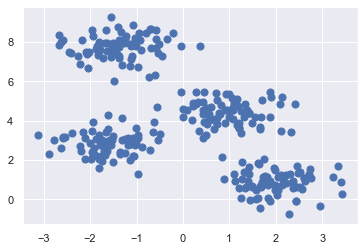

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

Fare clustering tramite k-Means e commentare i risultati

centroids: [[ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]]


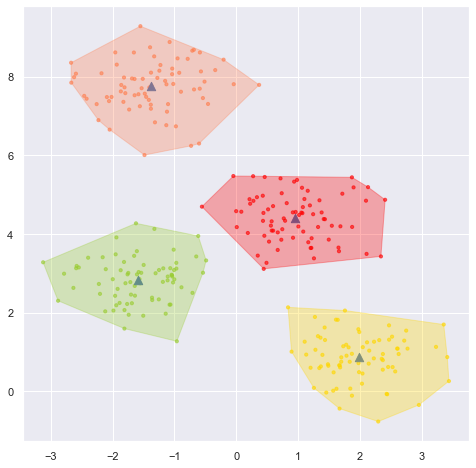

In [107]:
x = X[:,0]
y = X[:,1]
plot_kmeans_cluster(x, y, 4)    

centroids: [[ 1.20736718 -0.0825517 ]
 [-0.2003285   0.58035606]]


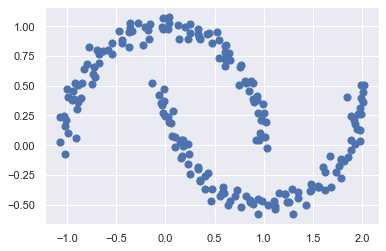

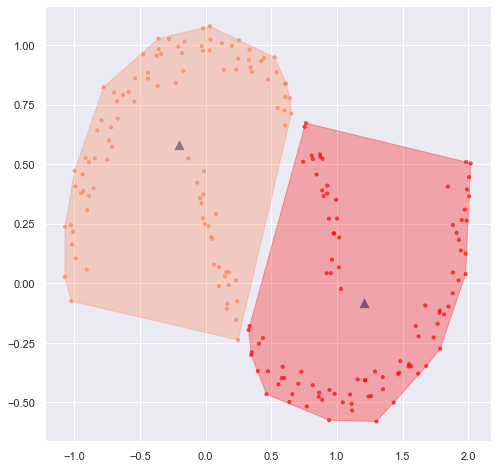

In [112]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

x = X[:,0]
y = X[:,1]
plot_kmeans_cluster(x, y, 2)

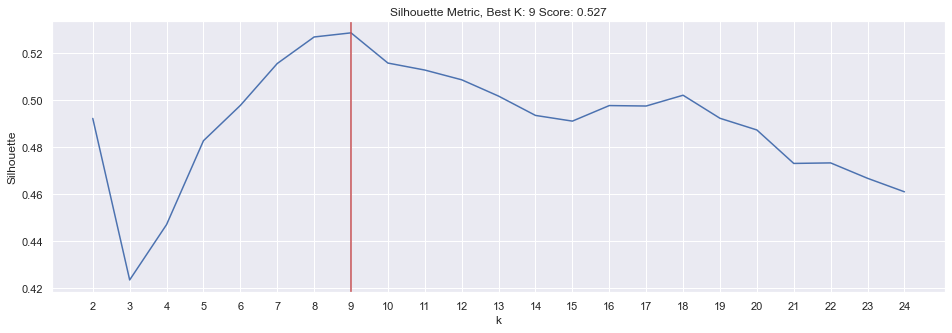

In [119]:
k_to_test = range(2,25,1) # [2,3,4, ..., 24]
silhouette_scores = {}

df_k = df[['x', 'y','cluster']]
for k in k_to_test:
    kmeans_k = KMeans( n_clusters = k )
    kmeans_k.fit(df_k.drop("cluster", axis = 1))
    labels_k = kmeans_k.labels_
    score_k = silhouette_score(df_k.drop("cluster", axis=1), labels_k)
    silhouette_scores[k] = score_k
best_k = max(silhouette_scores, key=silhouette_scores.get)

plt.figure(figsize = (16,5))
plt.plot(silhouette_scores.values())
plt.xticks(range(0,23,1), silhouette_scores.keys())
plt.title(f'Silhouette Metric, Best K: {best_k} Score: {silhouette_scores[key]:.3f}')
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.axvline(best_k-2, color = "r")
plt.show()

centroids: [[-0.2702956   0.92228448]
 [ 1.13323385 -0.4691901 ]
 [-0.88077157  0.42942994]
 [ 1.6672896  -0.23839572]
 [ 0.92190054  0.3132417 ]
 [ 0.08562986  0.14045167]
 [ 0.45470896  0.85770696]
 [ 1.95308423  0.26206751]
 [ 0.52156522 -0.35867213]]


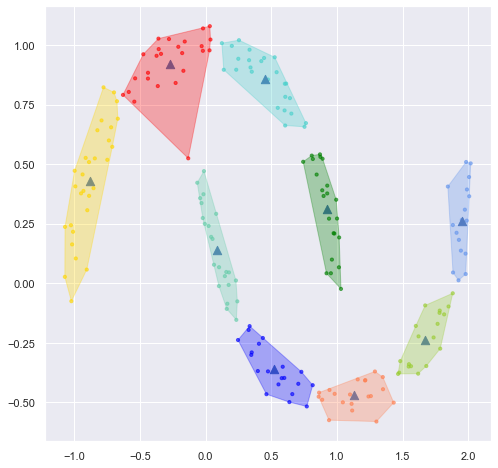

In [120]:

plot_kmeans_cluster(x, y, best_k)